In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
df = pd.read_csv('Data/kyphosis.csv')

In [33]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [37]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [36]:
df['Kyphosis'].replace({'absent': 0, 'present': 1}, inplace=True)

In [39]:
df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int64
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int64(4)
memory usage: 2.7 KB


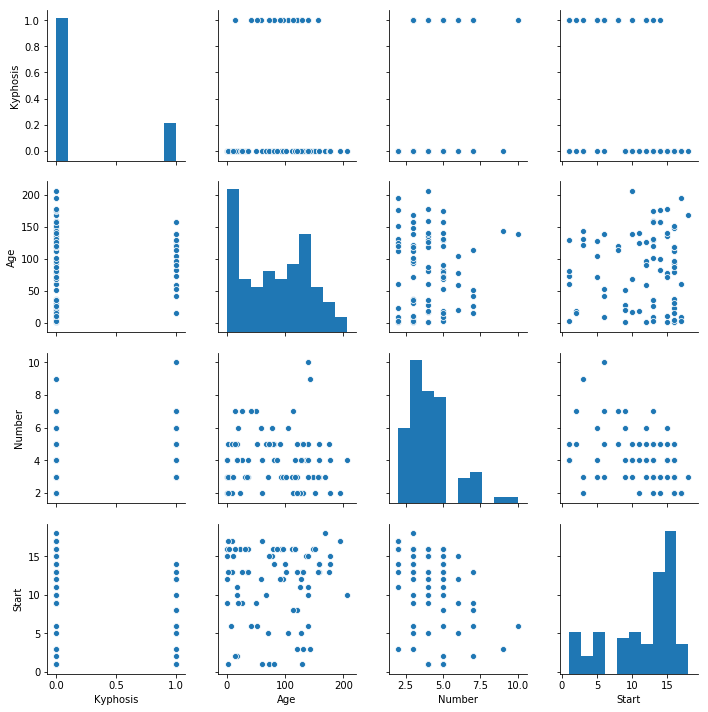

In [41]:
sns.pairplot(df)

In [47]:
target = pd.DataFrame(df['Kyphosis'])
encoder = OneHotEncoder()
target = encoder.fit_transform(target)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Kyphosis', axis=1), 
                                                    df['Kyphosis'],
                                                    test_size=0.2,
                                                    random_state=42)

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
y_pred = decision_tree.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  3]
 [ 2  1]]


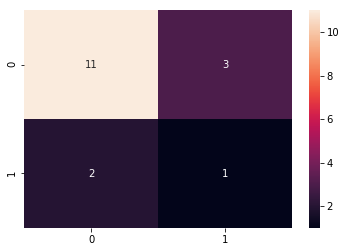

In [57]:
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17

